## Dimensionality reduction, Principal Component Analysis

### A more intuitive example

In [67]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import requests
from io import BytesIO

## Hardcoded input args
inDir='https://raw.githubusercontent.com/emilyzhou112/MUSA-650_Spring2024/master/Week04/Data/faces94'


In [53]:
## Read list of images
df = pd.read_csv("https://raw.githubusercontent.com/emilyzhou112/MUSA-650_Spring2024/master/Week04/Data/ListImages.csv")
df["path"]= df.IMGPATH.str.replace('.', '', 1)
df

<ipython-input-53-2b8e71f65a79>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["path"]= df.IMGPATH.str.replace('.', '', 1)


,CAT,ID,IMG,IMGPATH,path
0,male,pspliu,pspliu.19.jpg,./male/pspliu/pspliu.19.jpg,/male/pspliu/pspliu.19.jpg
1,male,pspliu,pspliu.12.jpg,./male/pspliu/pspliu.12.jpg,/male/pspliu/pspliu.12.jpg
2,male,pspliu,pspliu.15.jpg,./male/pspliu/pspliu.15.jpg,/male/pspliu/pspliu.15.jpg
3,male,pspliu,pspliu.13.jpg,./male/pspliu/pspliu.13.jpg,/male/pspliu/pspliu.13.jpg
4,male,pspliu,pspliu.2.jpg,./male/pspliu/pspliu.2.jpg,/male/pspliu/pspliu.2.jpg
...,...,...,...,...,...
3054,malestaff,ieorf,ieorf.15.jpg,./malestaff/ieorf/ieorf.15.jpg,/malestaff/ieorf/ieorf.15.jpg
3055,malestaff,ieorf,ieorf.12.jpg,./malestaff/ieorf/ieorf.12.jpg,/malestaff/ieorf/ieorf.12.jpg
3056,malestaff,ieorf,ieorf.2.jpg,./malestaff/ieorf/ieorf.2.jpg,/malestaff/ieorf/ieorf.2.jpg
3057,malestaff,ieorf,ieorf.11.jpg,./malestaff/ieorf/ieorf.11.jpg,/malestaff/ieorf/ieorf.11.jpg


In [78]:
## Read images as numpy array
response = requests.get(inDir + df.path[0])
tmpRGB = np.asarray(Image.open(BytesIO(response.content)))
imgSize = np.array(tmpRGB.shape)
imgSize = imgSize[[2,0,1]]

#dMat = np.zeros([df.shape[0], imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)
dMat = np.zeros([50, imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(50).iterrows():
    response = requests.get(inDir + tmpRow.path)
    tmpRGB = np.asarray(Image.open(BytesIO(response.content)))
    tmpRGB = np.moveaxis(tmpRGB,2,0)
    tmpRGB = tmpRGB.reshape([tmpRGB.shape[0], tmpRGB.shape[1]*tmpRGB.shape[2]])

    dMat[i,:, :] = tmpRGB


Reading images ...


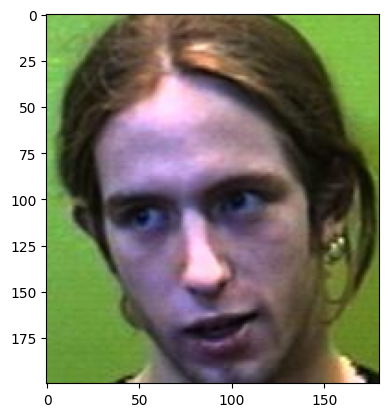

In [80]:
## Check few images
imTmp = dMat[37,:,:].reshape(imgSize)
imTmp = np.moveaxis(imTmp,0,2)
plt.imshow(imTmp)
plt.show()


In [91]:
## Read images as numpy array (as grayscale)
response = requests.get(inDir + df.path[0])
tmpRGB = np.asarray(Image.open(BytesIO(response.content)))
imgSize = np.array(tmpRGB.shape[0:2])

dMat = np.zeros([df.shape[0], np.prod(imgSize)]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(300).iterrows():

    response = requests.get(inDir + tmpRow.path)
    tmpRGB = np.asarray(Image.open(BytesIO(response.content)))

    tmpImage = Image.fromarray(tmpRGB)
    tmpGray = np.asarray(ImageOps.grayscale(tmpImage)).astype(np.uint8).flatten()

    dMat[i,:] = tmpGray

Reading images ...


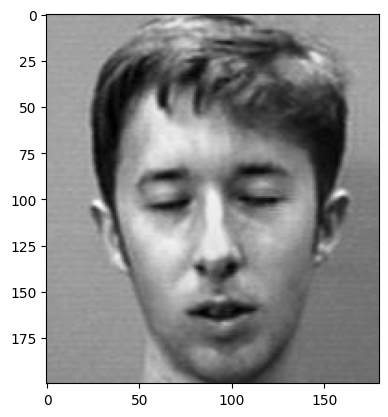

In [92]:
## Check few images
plt.imshow(dMat[217,:].reshape(imgSize).squeeze(), cmap='gray')
plt.show()

In [95]:
dMat

array([[121, 122, 122, ...,  82,  82,  82],
       [122, 121, 120, ...,  82,  82,  82],
       [123, 123, 124, ...,  84,  82,  81],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [93]:
## Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

NUM_COMP = 40

scaler = StandardScaler()
scaler.fit(dMat)
X = scaler.transform(dMat)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])


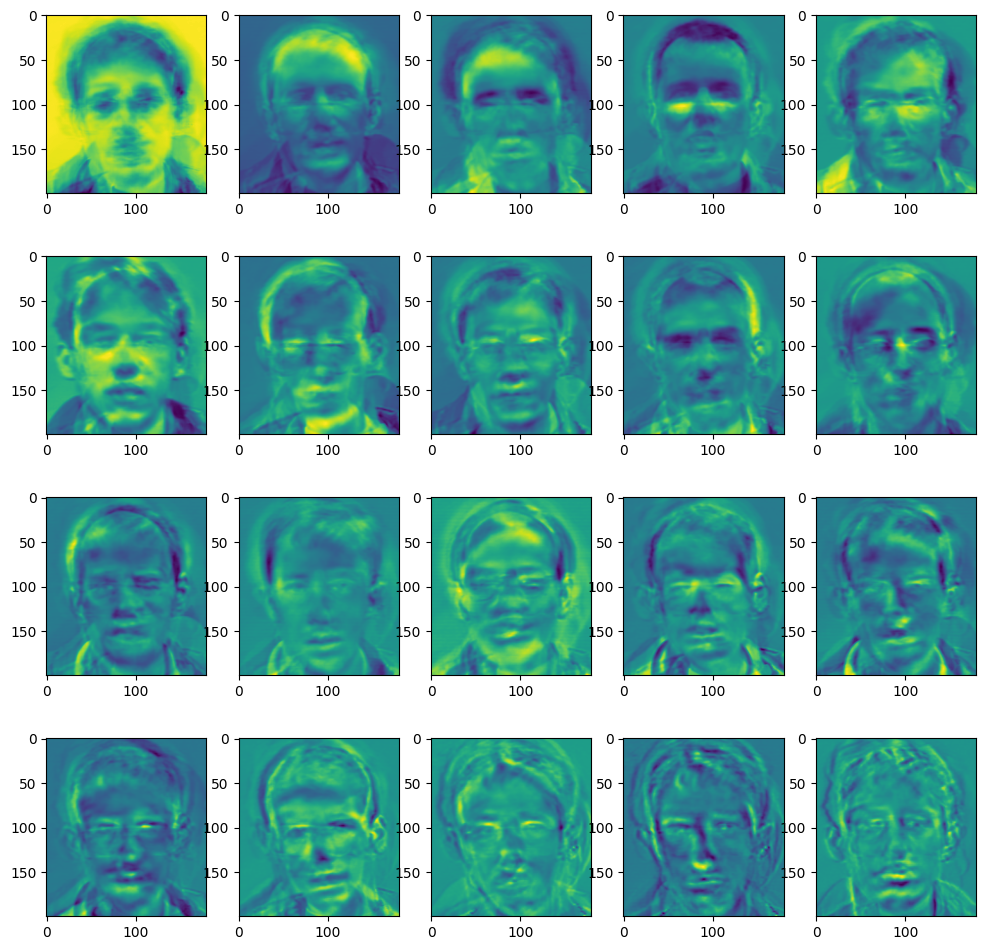

In [94]:
## Display eigenvectors (first n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[i,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()


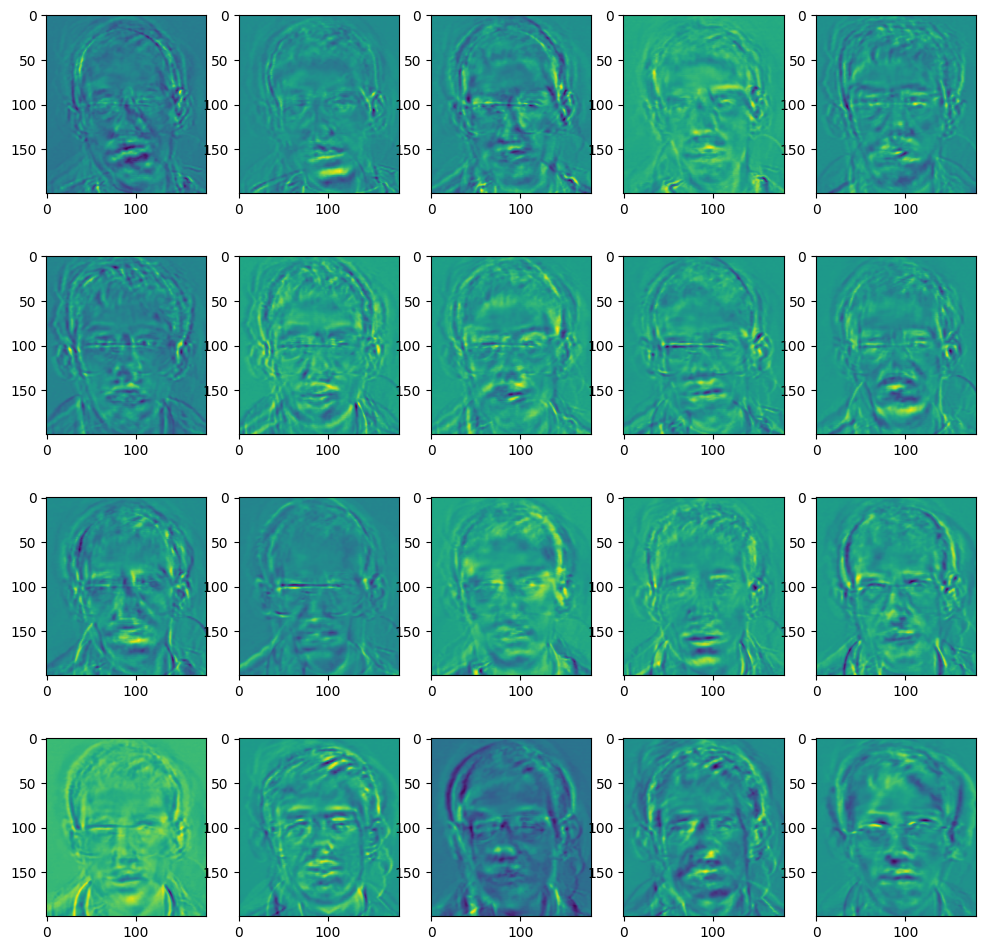

In [96]:
## Display eigenvectors (last n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[-i-1,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()

In [97]:
# how much variance do each of those principal component explain
print(pcaMdl.explained_variance_ratio_)
print(np.sum(pcaMdl.explained_variance_ratio_))

[8.27578989e-01 3.23918675e-02 2.00666345e-02 1.48254693e-02
 1.34647156e-02 1.15994426e-02 1.04430386e-02 8.04751216e-03
 6.98368650e-03 6.54247026e-03 5.53028021e-03 5.19898507e-03
 3.88993502e-03 3.77604074e-03 3.36374854e-03 2.02831862e-03
 1.89146927e-03 1.64046315e-03 1.31985641e-03 1.12792998e-03
 1.09730283e-03 9.35937177e-04 8.82975864e-04 7.78450371e-04
 7.44895295e-04 6.68855653e-04 6.28635018e-04 6.05570557e-04
 5.27971555e-04 5.13997074e-04 4.97193269e-04 4.61449508e-04
 3.93941997e-04 3.78433219e-04 3.62972333e-04 3.43242053e-04
 3.28414772e-04 3.02642080e-04 2.70884330e-04 2.52321544e-04]
0.9926869393901024


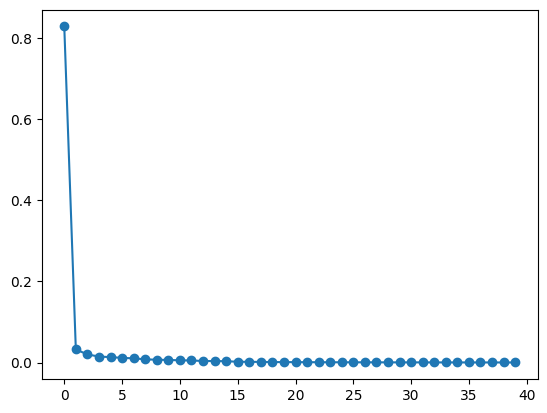

In [98]:
plt.plot(pcaMdl.explained_variance_ratio_, 'o-')

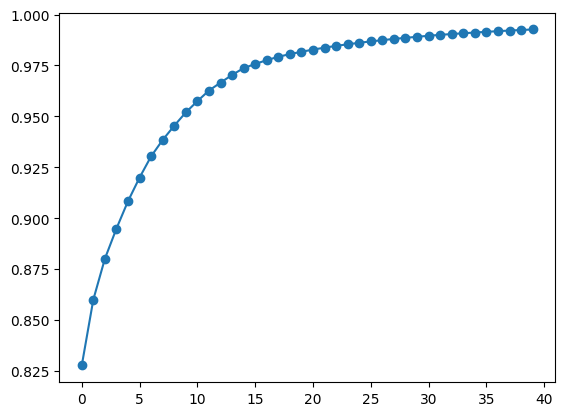

In [99]:
plt.plot(np.cumsum(pcaMdl.explained_variance_ratio_), 'o-')

### Reconstruction error using PCA

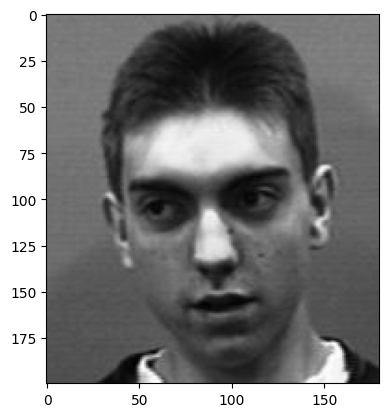

In [100]:
IMG_NO = 77

f1 = dMat[IMG_NO,:].reshape(imgSize)
plt.imshow(f1, cmap='gray')

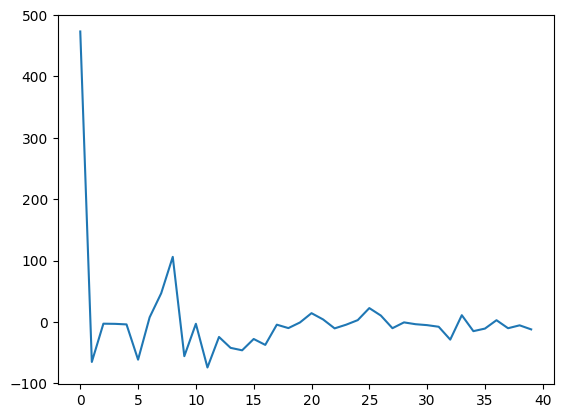

In [101]:
plt.plot(pcaCoor[IMG_NO,0:NUM_COMP])

#### A different subject

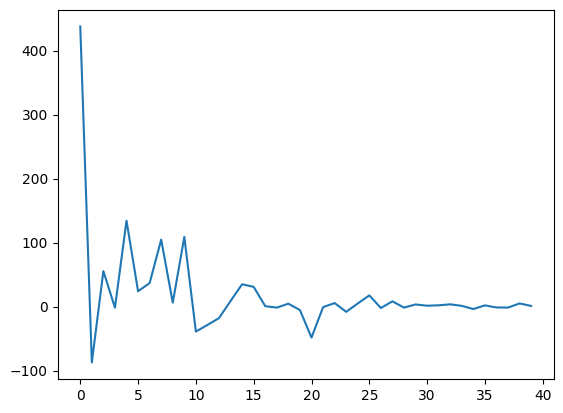

In [102]:
plt.plot(pcaCoor[0,0:NUM_COMP])

In [ ]:
NUM_COMP = 1
imgRecon = np.dot(pcaCoor[IMG_NO, 0:NUM_COMP], pcaMdl.components_[0:NUM_COMP,:])
imgRecon = scaler.inverse_transform(imgRecon)
f1 = imgRecon.reshape(imgSize)
plt.imshow(f1, cmap='gray')

In [ ]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()


### Difference image

In [ ]:
imgActual = dMat[IMG_NO,:]

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    f1 = imgDiff.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
plt.show()


In [ ]:
from numpy import linalg as LA

imgActual = dMat[IMG_NO, :]

for i in range(20):
    imgRecon = np.dot(pcaCoor[IMG_NO, 0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    print('Num PCA comp: ' + str(i) + ', reconstruction error: ' + str(LA.norm(imgDiff.flatten())))

